In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import util

In [2]:
pd.set_option('max_columns', None)

In [3]:
df = pd.read_csv('Data/KSI.csv')

In [3]:
df.shape

(16860, 57)

In [4]:
# converting column to datetype

df['DATE'] = pd.to_datetime(df['DATE'])

In [5]:
# extracting month name

df['Month'] = df['DATE'].dt.month_name()
df['YEAR'] = df['DATE'].dt.year
df['DAY'] = df['DATE'].dt.day_name()

In [6]:
df.head(2)

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
0,-8.844611e+06,5.412414e+06,3387730,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,<Null>,Major Arterial,Toronto and East York,4,11,43.656345,-79.45249,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Driver,unknown,None,<Null>,South,"Automobile, Station Wagon",Turning Left,Failed to Yield Right of Way,Unknown,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1
1,-8.844611e+06,5.412414e+06,3387731,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,<Null>,Major Arterial,Toronto and East York,4,11,43.656345,-79.45249,Intersection,At Intersection,Traffic Signal,Clear,Daylight,Dry,Fatal,Pedestrian Collisions,Pedestrian,65 to 69,Fatal,<Null>,North,Other,<Null>,<Null>,<Null>,Vehicle turns left while ped crosses with ROW ...,Crossing with right of way,Unknown,<Null>,<Null>,<Null>,Yes,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),2


In [22]:
df['HOUR'].unique()

array([ 8,  9,  2, 19, 15, 17,  6,  3, 21,  7, 14, 11, 18, 16, 22, 23, 13,
       12, 20,  5,  1, 10,  0,  4], dtype=int64)

C:\Users\kwanv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


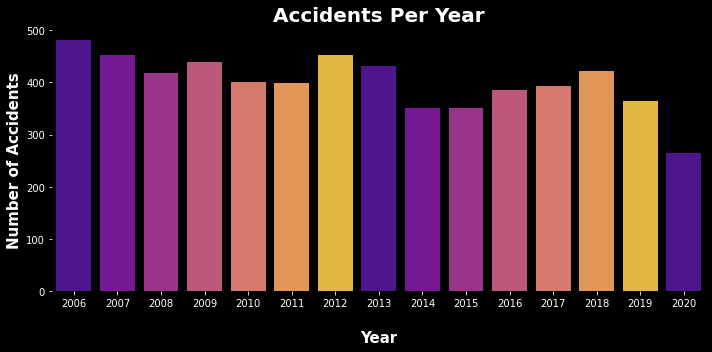

In [13]:
accidentsperyear = df.groupby(['YEAR'])['ACCNUM'].nunique()

# prepare plot
plt.style.use('dark_background')
plt.figure(figsize=(10,5))
colors = sns.color_palette("plasma", n_colors=7)
sns.barplot(accidentsperyear.index,accidentsperyear.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Year",fontsize=20,fontweight="bold")
plt.xlabel("\nYear", fontsize=15, fontweight="bold")
plt.ylabel("Number of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()


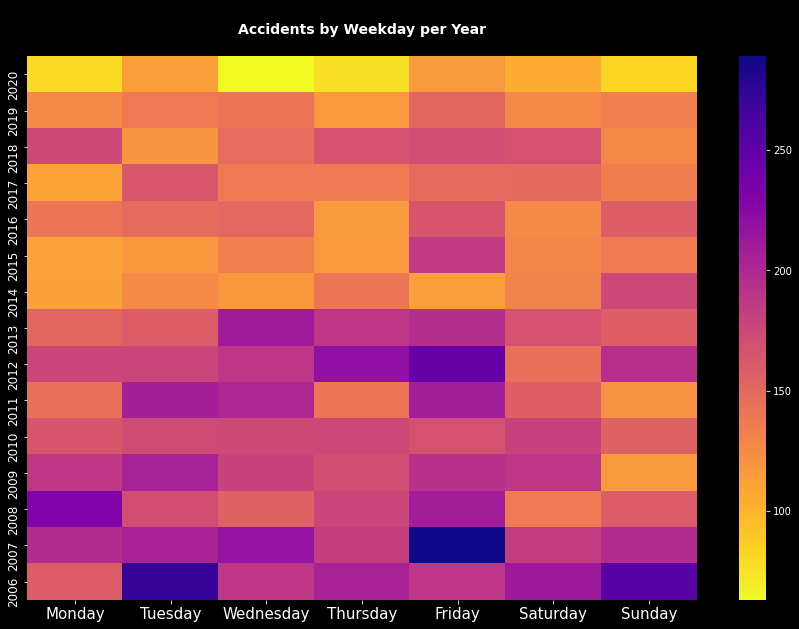

In [21]:


weekdays = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
accweekday = df.groupby(['YEAR', 'DAY']).size()
accweekday = accweekday.rename_axis(['YEAR', 'DAY'])\
                               .unstack('DAY')\
                               .reindex(columns=weekdays).sort_values(by = 'YEAR', ascending = False)
plt.figure(figsize=(15,10))
plt.style.use('dark_background')
sns.heatmap(accweekday, cmap='plasma_r')
plt.title('\nAccidents by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.show()



In [14]:
# need this for the plots - this is used to add the % tick marks in the plots
# the length of KSI.csv (removing accnum duplicates)

nstotal = float(len(df['ACCNUM'].drop_duplicates()))

C:\Users\kwanv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


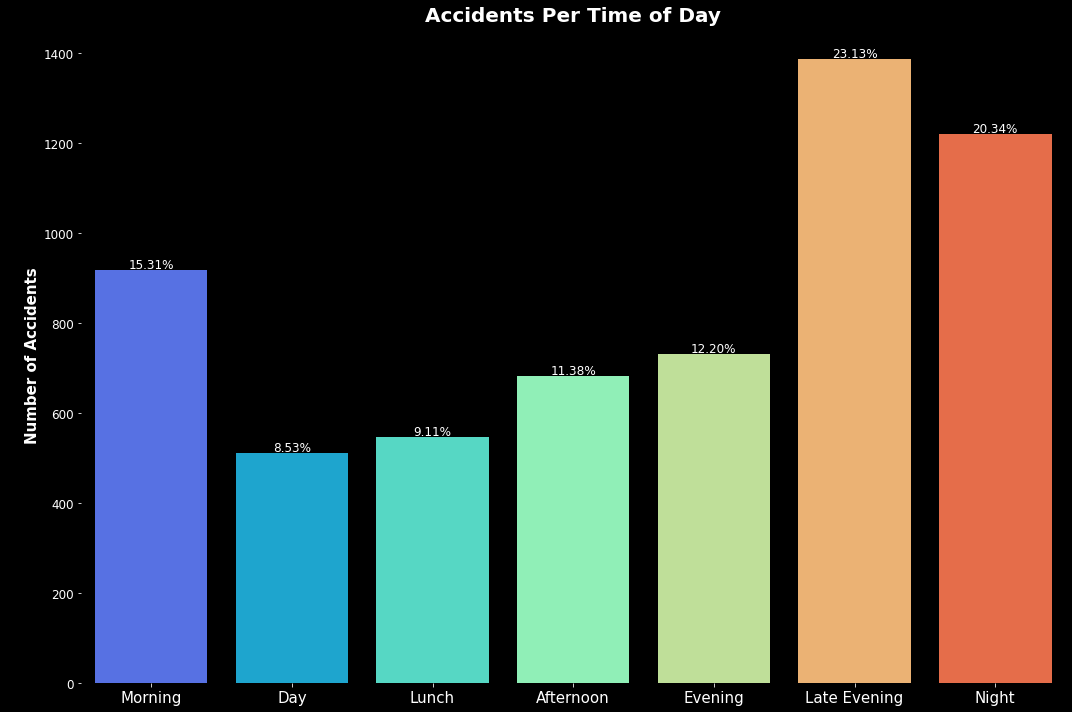

In [16]:
df['DAYTIME'] = df['HOUR'].apply(util.daygroup)
accidentspertod = df.groupby(['DAYTIME'])['ACCNUM'].nunique()

plt.style.use('dark_background')
plt.figure(figsize=(15,10))
tod=["Morning", "Day", "Lunch", "Afternoon", "Evening", "Late Evening", "Night"]
ax1 = sns.barplot(accidentspertod.index,accidentspertod.values, order = tod, palette='rainbow')
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{:1.2f}%'.format(height/nstotal*100),
            ha="center",fontsize=12) 
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Time of Day",fontsize=20,fontweight="bold")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)

plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('accidentspertod.png')

<AxesSubplot:>

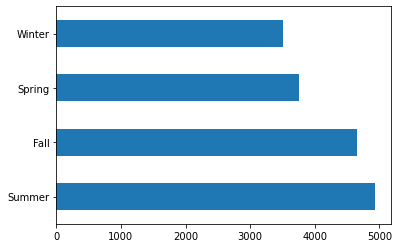

In [17]:
# More fatal accidents occur in Summer. Is it because people drive more in Summer?

# What we need to see is frequency of accidents per number of trips if possible (per capita)

df['Season'].value_counts().sort_values(ascending = False).plot(kind = 'barh')

In [23]:
df.groupby(['LIGHT','Season'])['ACCNUM'].nunique().unstack()

Season,Fall,Spring,Summer,Winter
LIGHT,,,,
Dark,391.0,210.0,262.0,342.0
"Dark, artificial",343.0,191.0,213.0,322.0
Dawn,9.0,12.0,5.0,10.0
"Dawn, artificial",19.0,5.0,7.0,7.0
Daylight,891.0,839.0,1181.0,537.0
"Daylight, artificial",19.0,13.0,13.0,6.0
Dusk,33.0,14.0,20.0,17.0
"Dusk, artificial",19.0,14.0,16.0,19.0
Other,1.0,2.0,NaN,NaN


<AxesSubplot:xlabel='LIGHT'>

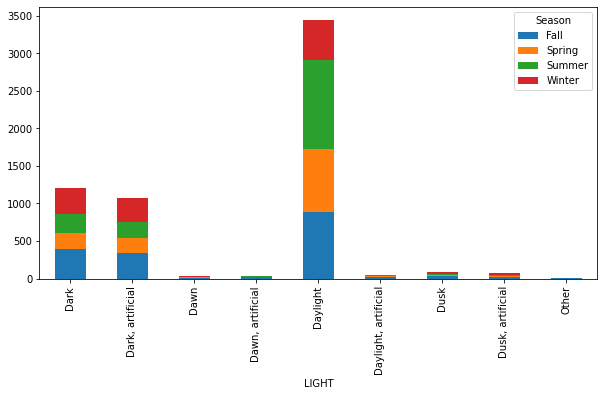

In [38]:
df.groupby(['LIGHT','Season'])['ACCNUM'].nunique().unstack().plot(kind = 'bar', stacked=True, figsize = (10, 5))

<AxesSubplot:xlabel='LIGHT'>

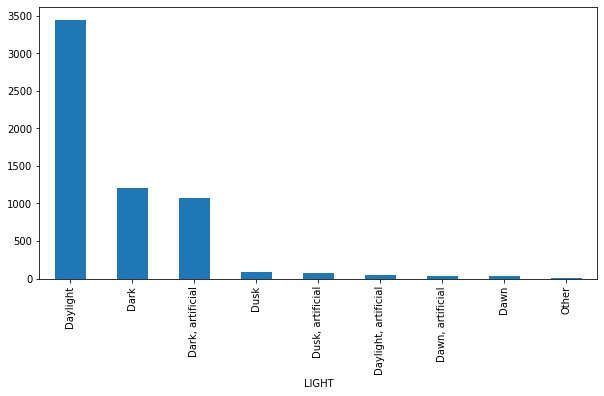

In [36]:
df.groupby('LIGHT')['ACCNUM'].nunique().sort_values(ascending = False).plot(kind = 'bar', stacked=True, figsize = (10, 5))

<AxesSubplot:xlabel='LIGHT'>

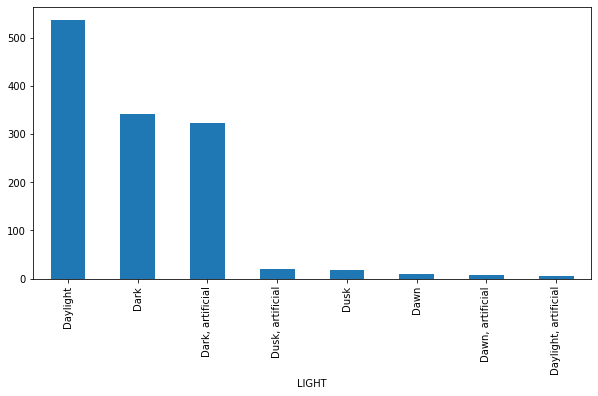

In [37]:
df[df['Season'] == 'Winter'].groupby(['LIGHT'])['ACCNUM'].nunique().sort_values(ascending = False).plot(kind = 'bar', stacked=True, figsize = (10, 5))

<AxesSubplot:xlabel='YEAR'>

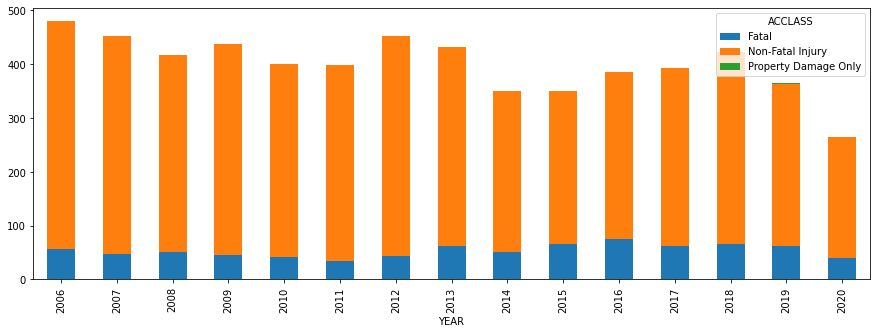

In [13]:
df.groupby(['YEAR','ACCLASS'])['ACCNUM'].nunique().unstack().plot(kind = 'bar', stacked=True, figsize = (15, 5))

In [13]:
df['DRIVCOND'].unique()

array(['Unknown', '<Null>', 'Ability Impaired, Alcohol',
       'Ability Impaired, Alcohol Over .08', 'Normal',
       'Had Been Drinking', 'Other', 'Inattentive',
       'Medical or Physical Disability', 'Fatigue',
       'Ability Impaired, Drugs'], dtype=object)

In [14]:
df['INJURY'].unique()

array(['None', 'Fatal', 'Minor', 'Major', 'Minimal', '<Null>'],
      dtype=object)

In [15]:
df['PEDTYPE'].unique()

array(['<Null>',
       'Vehicle turns left while ped crosses with ROW at inter.',
       'Pedestrian hit at mid-block',
       'Vehicle is going straight thru inter.while ped cross without ROW',
       'Pedestrian hit a PXO/ped. Mid-block signal',
       'Vehicle is going straight thru inter.while ped cross with ROW',
       'Other / Undefined',
       'Vehicle turns right while ped crosses without ROW at inter.',
       'Vehicle hits the pedestrian walking or running out from between parked vehicles at mid-block',
       'Pedestrian hit on sidewalk or shoulder',
       'Vehicle turns right while ped crosses with ROW at inter.',
       'Pedestrian involved in a collision with transit vehicle anywhere along roadway',
       'Unknown',
       'Vehicle turns left while ped crosses without ROW at inter.',
       'Vehicle is reversing and hits pedestrian',
       'Pedestrian hit at private driveway',
       'Pedestrian hit at parking lot'], dtype=object)

In [16]:
df['PEDACT'].unique()

array(['<Null>', 'Crossing with right of way',
       'Crossing, no Traffic Control', 'Crossing without right of way',
       'Crossing, Pedestrian Crossover', 'Running onto Roadway', 'Other',
       'Coming From Behind Parked Vehicle', 'On Sidewalk or Shoulder',
       'Pushing/Working on Vehicle', 'Walking on Roadway Against Traffic',
       'Walking on Roadway with Traffic', 'Person Getting on/off Vehicle',
       'Playing or Working on Highway',
       'Crossing marked crosswalk without ROW',
       'Person Getting on/off School Bus'], dtype=object)

In [8]:
# annoying to open results in new page to see everything
# this shows me all columns
pd.set_option('display.max_columns', None)


In [20]:
df[df['ACCNUM'] == 6000607400]

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,DIVISION,LATITUDE,LONGITUDE,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
12708,-8.851369e+06,5.425199e+06,80503019,6000607400,2016,2016/04/10 04:00:00+00,326,3,JANE ST,SHEPPARD AVE W,<Null>,Major Arterial,Etobicoke York,"7,6",31,43.739379,-79.513202,Intersection,Intersection Related,Traffic Signal,Clear,"Dark, artificial",Dry,Fatal,Rear End,Passenger,20 to 24,Fatal,23,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,Yes,Yes,<Null>,<Null>,<Null>,D31,25,Glenfield-Jane Heights (25),12709
12709,-8.851369e+06,5.425199e+06,80503077,6000607400,2016,2016/04/10 04:00:00+00,326,3,JANE ST,SHEPPARD AVE W,<Null>,Major Arterial,Etobicoke York,"7,6",31,43.739379,-79.513202,Intersection,Intersection Related,Traffic Signal,Clear,"Dark, artificial",Dry,Fatal,Rear End,Passenger,20 to 24,Fatal,24,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,Yes,Yes,<Null>,<Null>,<Null>,D31,25,Glenfield-Jane Heights (25),12710
12710,-8.851369e+06,5.425199e+06,80503078,6000607400,2016,2016/04/10 04:00:00+00,326,3,JANE ST,SHEPPARD AVE W,<Null>,Major Arterial,Etobicoke York,"7,6",31,43.739379,-79.513202,Intersection,Intersection Related,Traffic Signal,Clear,"Dark, artificial",Dry,Fatal,Rear End,Passenger,15 to 19,Fatal,22,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,Yes,Yes,<Null>,<Null>,<Null>,D31,25,Glenfield-Jane Heights (25),12711
12711,-8.851369e+06,5.425199e+06,80503079,6000607400,2016,2016/04/10 04:00:00+00,326,3,JANE ST,SHEPPARD AVE W,<Null>,Major Arterial,Etobicoke York,"7,6",31,43.739379,-79.513202,Intersection,Intersection Related,Traffic Signal,Clear,"Dark, artificial",Dry,Fatal,Rear End,Passenger,20 to 24,Major,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,Yes,Yes,<Null>,<Null>,<Null>,D31,25,Glenfield-Jane Heights (25),12712
12712,-8.851369e+06,5.425199e+06,80503080,6000607400,2016,2016/04/10 04:00:00+00,326,3,JANE ST,SHEPPARD AVE W,<Null>,Major Arterial,Etobicoke York,"7,6",31,43.739379,-79.513202,Intersection,Intersection Related,Traffic Signal,Clear,"Dark, artificial",Dry,Fatal,Rear End,Driver,20 to 24,Major,<Null>,South,"Automobile, Station Wagon",Changing Lanes,Speed too Fast For Condition,Had Been Drinking,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,Yes,Yes,<Null>,<Null>,<Null>,D31,25,Glenfield-Jane Heights (25),12713
12713,-8.851369e+06,5.425199e+06,80503081,6000607400,2016,2016/04/10 04:00:00+00,326,3,JANE ST,SHEPPARD AVE W,<Null>,Major Arterial,Etobicoke York,"7,6",31,43.739379,-79.513202,Intersection,Intersection Related,Traffic Signal,Clear,"Dark, artificial",Dry,Fatal,Rear End,Driver,45 to 49,Minor,<Null>,South,"Automobile, Station Wagon",Stopped,Driving Properly,Normal,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,<Null>,Yes,Yes,Yes,<Null>,<Null>,<Null>,D31,25,Glenfield-Jane Heights (25),12714


In [50]:
# making small function to collapse all drinking conditions into one

def drivcond(col):
    if col['DRIVCOND'] in ('Ability Impaired, Alcohol Over .08', 'Had Been Drinking', 'Ability Impaired, Alcohol'):
        return 'Drinking'
    
    # if not drinking, return condition
    
    return col['DRIVCOND']

In [51]:
df['DRIVCOND2'] = df.apply(drivcond, axis = 1)

<AxesSubplot:ylabel='DRIVCOND2'>

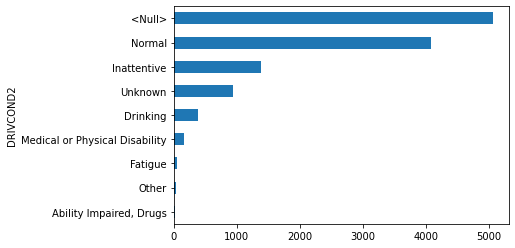

In [52]:
df.groupby('DRIVCOND2')['ACCNUM'].nunique().sort_values().plot(kind = 'barh')

<AxesSubplot:ylabel='INVAGE'>

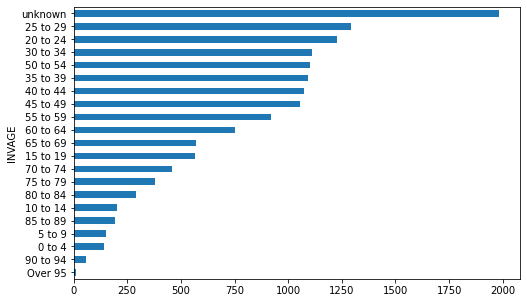

In [41]:
df.groupby('INVAGE')['ACCNUM'].nunique().sort_values().plot(kind = 'barh', figsize = (8,5))

<AxesSubplot:>

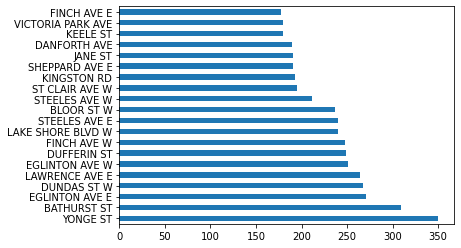

In [43]:
df['STREET1'].value_counts().sort_values(ascending = False)[:20].plot.barh()

<AxesSubplot:>

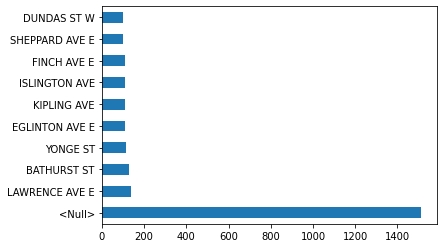

In [45]:
df['STREET2'].value_counts().sort_values(ascending = False)[:10].plot.barh()